In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [4]:
from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [5]:
df=pd.read_csv('exchange_rate.csv')

In [6]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
df.shape

(7588, 2)

In [9]:
df.size

15176

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [11]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [12]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

<Axes: xlabel='date'>

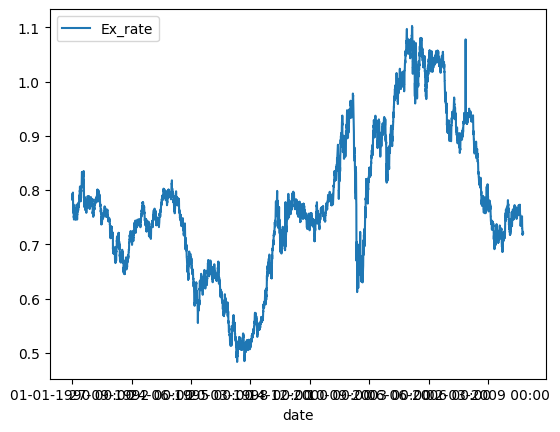

In [15]:
# Creating the index for the dataset
df.set_index('date',inplace=True)
df.dropna(inplace=True)
df.plot()

In [16]:
df['Ex_rate'].unique()

array([0.7855  , 0.7818  , 0.7867  , ..., 0.719735, 0.723197, 0.720825])

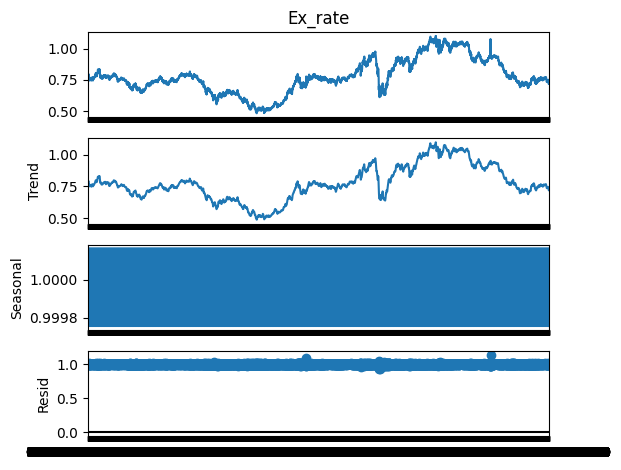

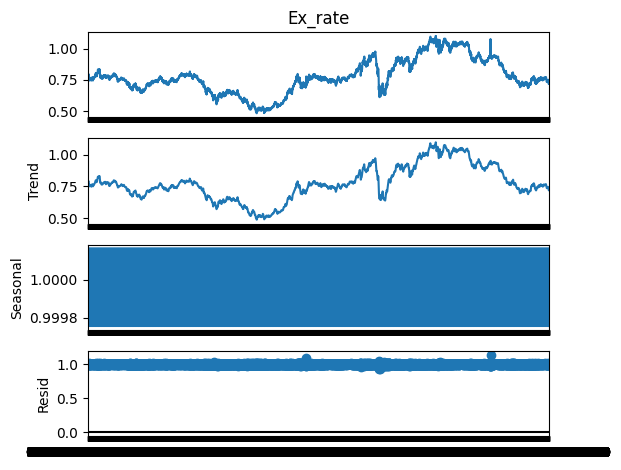

In [17]:
# Decomposing
result=seasonal_decompose(df['Ex_rate'],model='multiplicative',period=7)
result.seasonal.plot()

<Axes: xlabel='date'>

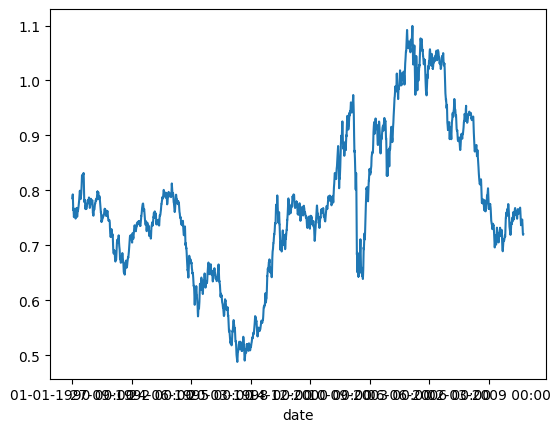

In [18]:
result.trend.plot()

<Axes: xlabel='date'>

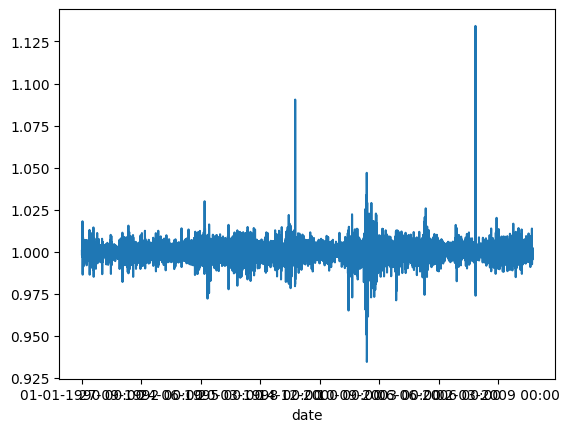

In [19]:
result.resid.plot()

In [20]:
ts_data=df['Ex_rate']

In [21]:
ts_data_log=np.log(ts_data)


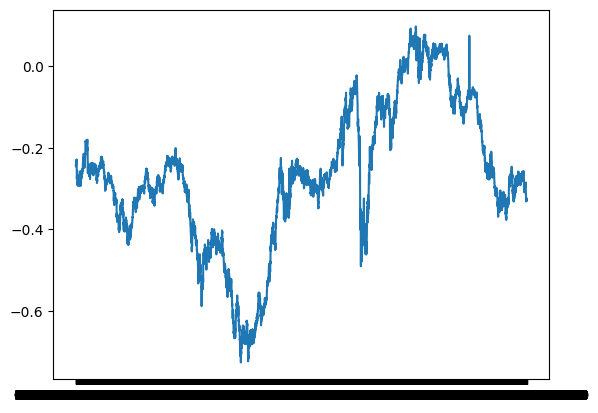

In [22]:
plt.plot(ts_data_log)

In [23]:
timeseries=df['Ex_rate']

In [34]:
def test_stationarity(timeseries):
    # calculating rooling mean and rolling std dev
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')

    print('Results of Dickey_Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output=pd.Series(df_test[0:4],index=['Test Statistic','p_value','#Lags Used','Number of Observations'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey_Fuller Test :

Test Statistic              -1.664994
p_value                      0.449233
#Lags Used                   1.000000
Number of Observations    7586.000000
Critical Value (1%)         -3.431212
Critical Value (5%)         -2.861921
Critical Value (10%)        -2.566973
dtype: float64


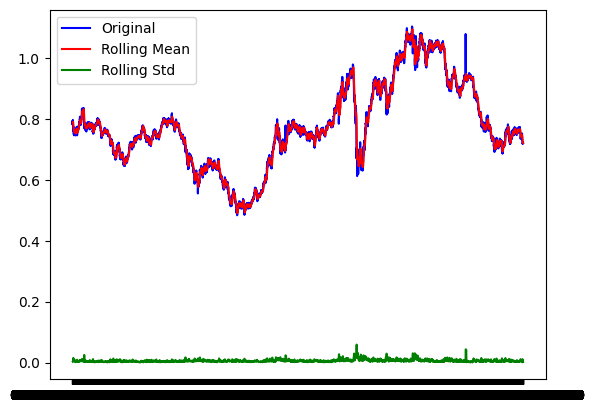

In [35]:
#checking the stationarity of data using Dickey_Fuller test
test_stationarity(df['Ex_rate'])

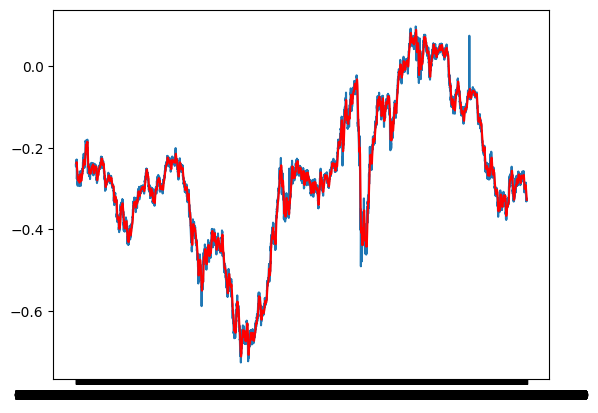

In [39]:
movingAverage = ts_data_log.rolling(window =12).mean()
movingSTD =ts_data_log.rolling(window =12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [41]:
# Differencing the moving average data
ts_data_log_diff=ts_data_log-movingAverage
ts_data_log_diff.head(20)

date
01-01-1990 00:00         NaN
02-01-1990 00:00         NaN
03-01-1990 00:00         NaN
04-01-1990 00:00         NaN
05-01-1990 00:00         NaN
06-01-1990 00:00         NaN
07-01-1990 00:00         NaN
08-01-1990 00:00         NaN
09-01-1990 00:00         NaN
10-01-1990 00:00         NaN
11-01-1990 00:00         NaN
12-01-1990 00:00    0.007278
13-01-1990 00:00    0.005678
14-01-1990 00:00    0.006632
15-01-1990 00:00   -0.017983
16-01-1990 00:00   -0.032204
17-01-1990 00:00   -0.034461
18-01-1990 00:00   -0.028752
19-01-1990 00:00   -0.022119
20-01-1990 00:00   -0.016174
Name: Ex_rate, dtype: float64

In [43]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

date
12-01-1990 00:00    0.007278
13-01-1990 00:00    0.005678
14-01-1990 00:00    0.006632
15-01-1990 00:00   -0.017983
16-01-1990 00:00   -0.032204
Name: Ex_rate, dtype: float64

Results of Dickey_Fuller Test :

Test Statistic           -1.404275e+01
p_value                   3.281274e-26
#Lags Used                2.900000e+01
Number of Observations    7.547000e+03
Critical Value (1%)      -3.431217e+00
Critical Value (5%)      -2.861923e+00
Critical Value (10%)     -2.566974e+00
dtype: float64


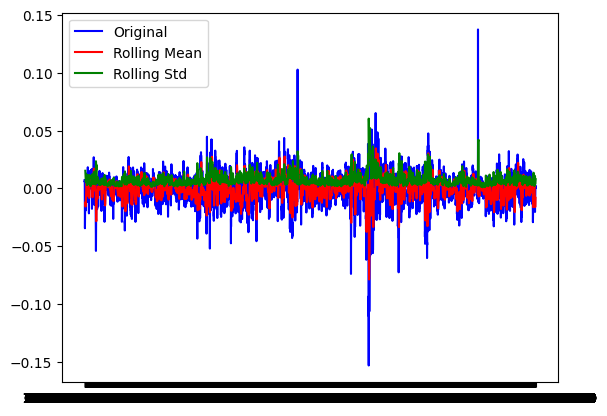

In [44]:
# checking the data having stationarity or not
test_stationarity(ts_data_log_diff)

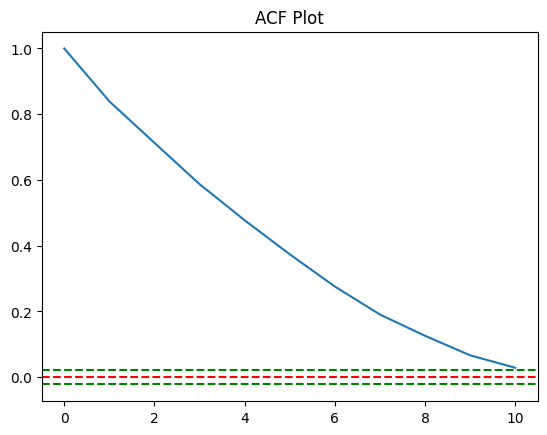

In [50]:
# plotting the ACF Curve
plt.plot(np.arange(0,11),acf(ts_data_log_diff,nlags=10))
plt.axhline(y=0,linestyle= '--',color='red')
# Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)),linestyle='--',color='green')
plt.title('ACF Plot')
plt.show()

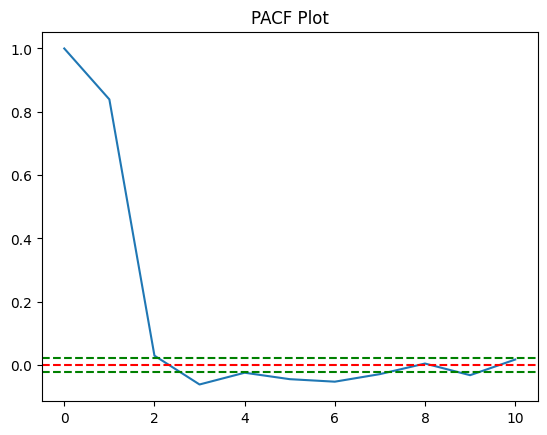

In [53]:
# plotting the PACF curve
plt.plot(np.arange(0,11),pacf(ts_data_log_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='red')
# Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)),linestyle='--',color='green')
plt.title('PACF Plot')
plt.show()

In [54]:
pip install statsmodels

In [58]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Ex_rate'],order=(1,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
result=model.fit()

<Axes: xlabel='date'>

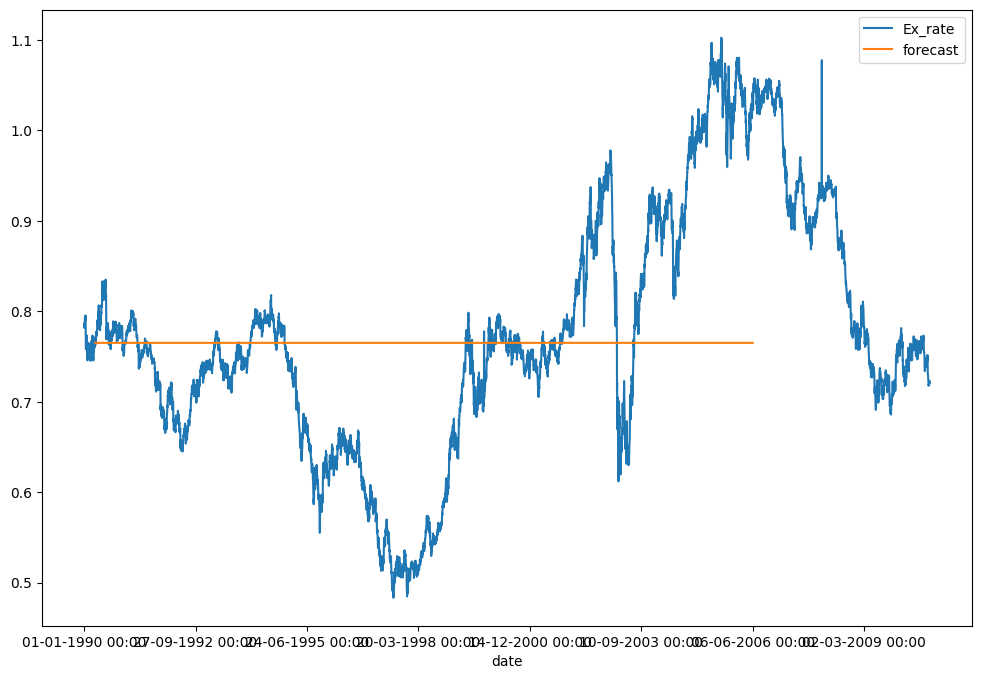

In [72]:
df['forecast']=result.predict(start=100,end=6000,dynamic=True)
df[['Ex_rate','forecast']].plot(figsize=(12,8))

In [67]:
result.predict()

date
01-01-1990 00:00    0.000000
02-01-1990 00:00    0.785500
03-01-1990 00:00    0.782286
04-01-1990 00:00    0.786062
05-01-1990 00:00    0.786107
                      ...   
06-10-2010 00:00    0.718844
07-10-2010 00:00    0.718515
08-10-2010 00:00    0.721411
09-10-2010 00:00    0.723006
10-10-2010 00:00    0.721113
Name: predicted_mean, Length: 7588, dtype: float64

In [70]:
result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7588    0.720830
7589    0.720844
7590    0.720836
7591    0.720841
7592    0.720838
7593    0.720840
7594    0.720839
7595    0.720839
7596    0.720839
7597    0.720839
7598    0.720839
7599    0.720839
7600    0.720839
7601    0.720839
7602    0.720839
7603    0.720839
7604    0.720839
7605    0.720839
7606    0.720839
7607    0.720839
7608    0.720839
7609    0.720839
7610    0.720839
7611    0.720839
7612    0.720839
7613    0.720839
7614    0.720839
7615    0.720839
7616    0.720839
7617    0.720839
Name: predicted_mean, dtype: float64

In [73]:
result.fittedvalues

date
01-01-1990 00:00    0.000000
02-01-1990 00:00    0.785500
03-01-1990 00:00    0.782286
04-01-1990 00:00    0.786062
05-01-1990 00:00    0.786107
                      ...   
06-10-2010 00:00    0.718844
07-10-2010 00:00    0.718515
08-10-2010 00:00    0.721411
09-10-2010 00:00    0.723006
10-10-2010 00:00    0.721113
Length: 7588, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

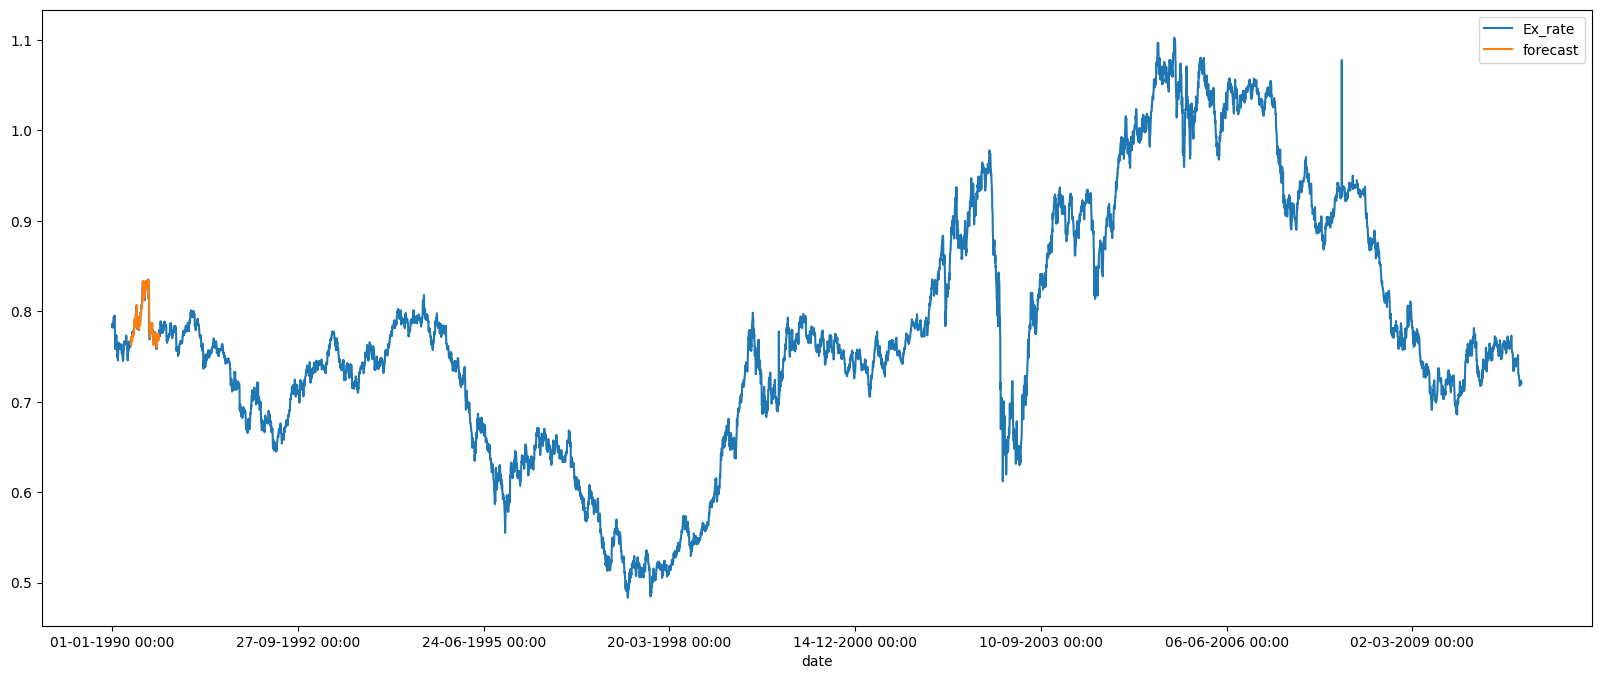

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model=SARIMAX(df['Ex_rate'],order=(1,1,2),seasonal_order=(1,1,2,12))
results1=Model.fit()
df['forecast']=results1.predict(start=100,end=250)
df[['Ex_rate','forecast']].plot(figsize=(20,8))

In [76]:
# Exponential smoothing method

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt #Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [161]:
df=pd.read_csv('exchange_rate.csv')

In [162]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


<Axes: >

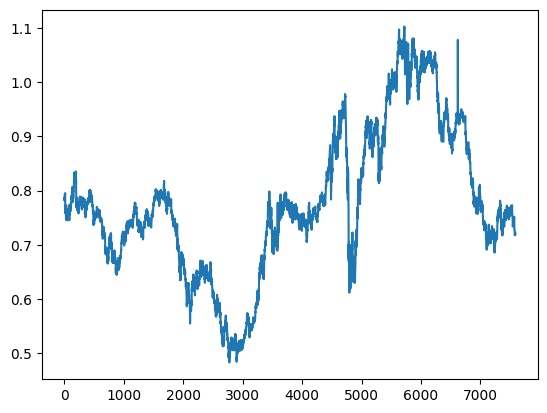

In [163]:
df.Ex_rate.plot()

In [164]:
 train=df.head(7000)
 test=df.tail(588)

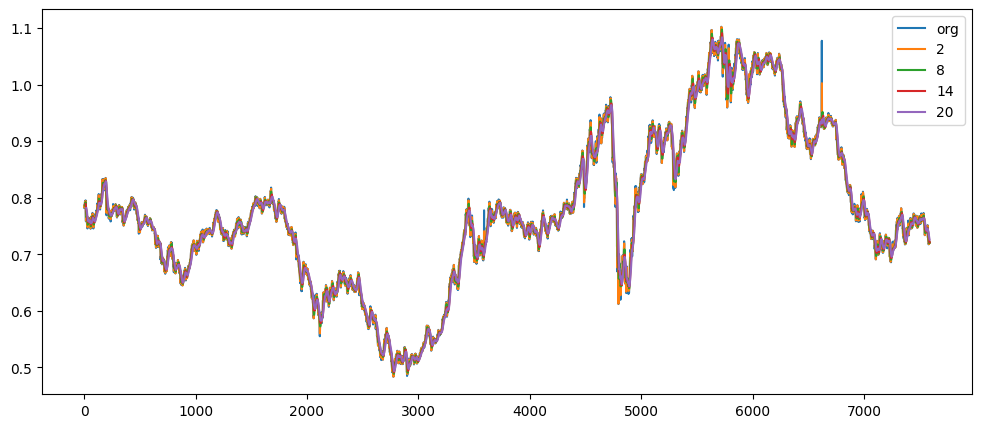

In [172]:
plt.figure(figsize=(12,5))
df.Ex_rate.plot(label='org')
for i in range(2,24,6):
    df['Ex_rate'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [166]:
# Time series decomposition plot

In [173]:
decompose_ts_add = seasonal_decompose(data.Ex_rate,period=12)

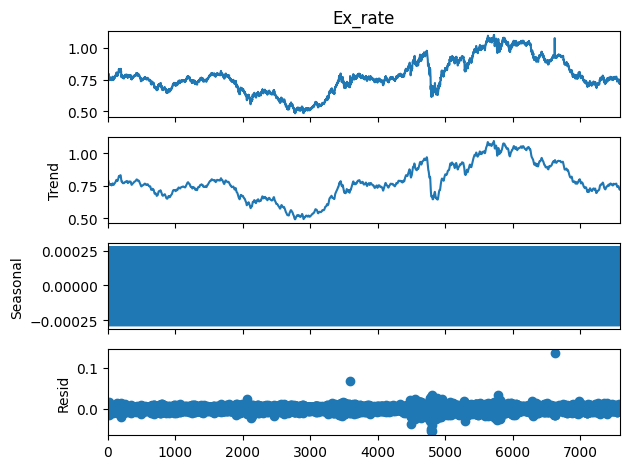

In [174]:
decompose_ts_add.plot()
plt.show()

In [207]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred_org)/org)*100
    return np.mean(temp)

In [208]:
# Simple Exponential Method

In [203]:
train['Ex_rate'] = train['Ex_rate'].astype('double')
ses_model =SimpleExpSmoothing(train['Ex_rate']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start= test.index[0],end=test.index[-1])

<ipython-input-203-a678cee7a1df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ex_rate'] = train['Ex_rate'].astype('double')
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [209]:
# Holt Method

In [183]:
hw_model = Holt(train['Ex_rate']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

<ipython-input-183-79807de3e6f2>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train['Ex_rate']).fit(smoothing_level=0.8,smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [210]:
# Holt winter exponential smoothing with additive seasonality and additive trend

In [201]:
hwe_model_add_add = ExponentialSmoothing(train['Ex_rate'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

In [191]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [202]:
hwe_model_mul_add = ExponentialSmoothing(train['Ex_rate'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

In [211]:
#Final model by combaining train and test

In [212]:
df['Ex_rate']=df['Ex_rate'].astype('double')
hwe_model_mul_add=ExponentialSmoothing(df['Ex_rate'],seasonal='add',trend='add',seasonal_periods=12).fit()

In [213]:
# Forecasting for next 10 times periods

In [214]:
hwe_model_mul_add.forecast(10)

7588    0.720812
7589    0.720594
7590    0.720259
7591    0.720518
7592    0.720356
7593    0.720478
7594    0.720538
7595    0.720243
7596    0.720424
7597    0.720465
dtype: float64

In [ ]:
# ARIMA model requires stationarity of time series for the choice of model through ACF,PACF,stationarity condition doesn't apply in exponential smoothing
# but ARIMA is a good procedure to analysis time series,it take differences of time series to become stationary
# Exponential smoothing is a simple procedure to study time series,not used to analysis
#ARIMA is suitable for linear patterns may not perform well for non linear data(disadvantage),its not suitable for non stationarity data